In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import datasets

In [ ]:
#Read dataset to pandas dataframe
dataset = pd.read_excel('/content/drive/MyDrive/MTP_FINAL/Chilikaujainiukai_Inland_Water/CHILIKAUJANI.xlsx')

In [ ]:
dataset_y=dataset['Chlorophyll']
dataset_x=dataset.drop(['Chlorophyll','Site'],axis=1)


In [ ]:
cor_matrix = dataset_x.corr().abs()
print(cor_matrix)

          400       401       402       403       404       405       406  \
400  1.000000  0.999937  0.999872  0.999764  0.999679  0.999512  0.999275   
401  0.999937  1.000000  0.999909  0.999761  0.999712  0.999661  0.999462   
402  0.999872  0.999909  1.000000  0.999940  0.999861  0.999751  0.999664   
403  0.999764  0.999761  0.999940  1.000000  0.999955  0.999802  0.999751   
404  0.999679  0.999712  0.999861  0.999955  1.000000  0.999921  0.999835   
..        ...       ...       ...       ...       ...       ...       ...   
796  0.933514  0.934105  0.934880  0.934694  0.934568  0.934920  0.935864   
797  0.931768  0.932449  0.933232  0.933006  0.932893  0.933327  0.934320   
798  0.931721  0.932414  0.933228  0.933058  0.932995  0.933455  0.934449   
799  0.931417  0.932053  0.932972  0.932901  0.932859  0.933282  0.934292   
800  0.930044  0.930722  0.931660  0.931601  0.931583  0.932047  0.933075   

          407       408       409  ...       791       792       793  \
400

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

     400       401       402       403       404       405       406  \
400  NaN  0.999937  0.999872  0.999764  0.999679  0.999512  0.999275   
401  NaN       NaN  0.999909  0.999761  0.999712  0.999661  0.999462   
402  NaN       NaN       NaN  0.999940  0.999861  0.999751  0.999664   
403  NaN       NaN       NaN       NaN  0.999955  0.999802  0.999751   
404  NaN       NaN       NaN       NaN       NaN  0.999921  0.999835   
..   ...       ...       ...       ...       ...       ...       ...   
796  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
797  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
798  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
799  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
800  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          407       408       409  ...       791       792       793  \
400  0.998933  0.998573  0.998075  ...  0.935566  0.934359  0.9

In [ ]:
to_drop = [column%400 for column in upper_tri.columns if any(upper_tri[column] > 0.999)]
print(to_drop)
len(to_drop)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

398

In [ ]:
#dataset_x_1 = dataset_x.drop(dataset_x.columns[to_drop], axis=1)
dataset_x_1 = dataset_x.drop(dataset_x.columns[to_drop], axis=1)
print(dataset_x_1)
dataset_x_1 = StandardScaler().fit_transform(dataset_x_1)

         760       761       800
0   0.002484  0.002494  0.003813
1   0.001267  0.001276  0.001845
2   0.001728  0.001740  0.002480
3   0.004440  0.004561  0.003960
4   0.000677  0.000658  0.000703
5   0.000701  0.000715  0.000746
6   0.001794  0.001807  0.001542
7   0.001995  0.002012  0.001707
8   0.001939  0.001950  0.001641
9   0.001553  0.001558  0.001351
10  0.001569  0.001576  0.001376
11  0.002194  0.002225  0.001779
12  0.001987  0.002016  0.001612
13  0.001904  0.001913  0.001579
14  0.004431  0.004844  0.004678
15  0.006964  0.006705  0.007275
16  0.008867  0.008945  0.008811
17  0.004229  0.004247  0.004420
18  0.003632  0.003592  0.003938
19  0.003505  0.003026  0.004674
20  0.001648  0.001659  0.002498
21  0.001376  0.001378  0.002142
22  0.002391  0.002404  0.003571
23  0.002549  0.002525  0.003047
24  0.004592  0.004585  0.004854
25  0.003735  0.003724  0.004284
26  0.002429  0.002370  0.002807
27  0.007094  0.007073  0.007289
28  0.000656  0.000642  0.000707
29  0.0022

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_x_1, dataset_y, test_size=0.3, random_state=42)

          **Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

7.034465988634874
0.2437988029956195
6.0220160136230225
0.4547850124035415


          **Gradient Boost Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
y_predicted_gb = model_gb.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gb))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gb)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gb)
print(mape)

6.452629965793107
0.36371950036377654
5.308876551639937
0.32034001446200183


In [ ]:
#Hyperparameter tuning
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,subsample=0.5,max_depth=4,random_state=1)
model_gbhp = GBR2.fit(X_train, y_train)
y_predicted_gbhp = model_gbhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gbhp))
print(rms)
r_square = model_gbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gbhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
print(mape)

7.376924533465011
0.16837837615083895
5.570935932219485
0.34952765967525123


          **PLS Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression
model_plsr = PLSRegression(n_components=41, scale=True)
model_plsr.fit(X_train, y_train)
y_predicted_plsr = model_plsr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_plsr))
print(rms)
r_square = model_plsr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_plsr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_plsr)
print(mape)

7.0344659886349605
0.24379880299560108
6.0220160136231415
0.454785012403548


In [ ]:
#Hyperparameter Tuning
r_square = []
rms = []
mae = []
mape = [] #to store rmse values for different n_components
for n_comp in range(1, 41):
  model_plsrhp = PLSRegression(n_components=n_comp, scale=True)
  model_plsrhp.fit(X_train, y_train)
  y_predicted_plsrhp = model_plsrhp.predict(X_test)
  rms_val = sqrt(mean_squared_error(y_test,y_predicted_plsrhp)) #calculate rmse
  rms.append(rms_val) #store rmse values
  r2 = model_plsrhp.score(X_test,y_test)
  r_square.append(r2) #store r2 values
  mae_1 = mean_absolute_error(y_test,y_predicted_plsrhp)
  mae.append(mae_1)
  mape_1 = mean_absolute_percentage_error(y_test, y_predicted_plsrhp)
  mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

7.0344659886349605
0.24379880299560108
6.0220160136231415
0.4403032296615002


           ** Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 500)
model_rfr.fit(X_train,y_train)
y_predicted_rfr = model_rfr.predict(X_test)  

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfr))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfr)
print(mape)

6.282033203052142
0.36371950036377654
5.017847333173344
0.3379343268841157


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_rfrhp = grid_search.best_estimator_
model_rfrhp.fit(X_train,y_train)
y_predicted_rfrhp = model_rfrhp.predict(X_test) 

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfrhp))
print(rms)
r_square = model_rfrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfrhp)
print(mape)

6.315683355197881
0.3904409436327805
4.9061163293086665
0.3436110424059813


          **KNN**

In [ ]:
from sklearn import neighbors
r_square = []
rms = []
mae = []
mape = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    y_predicted_knn = model_knn.predict(X_test) #make prediction on test set
    rms_val = sqrt(mean_squared_error(y_test,y_predicted_knn)) #calculate rmse
    rms.append(rms_val) #store rmse values
    r2 = model_knn.score(X_test,y_test)
    r_square.append(r2) #store r2 values
    mae_1 = mean_absolute_error(y_test,y_predicted_knn)
    mae.append(mae_1)
    mape_1 = mean_absolute_percentage_error(y_test, y_predicted_knn)
    mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

4.6920349425579415
0.6635677906617903
3.618299844833333
0.26521946001681357


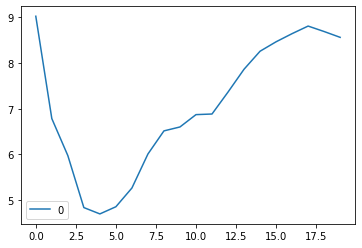

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rms) #elbow curve 
curve.plot()

                    **SVR**

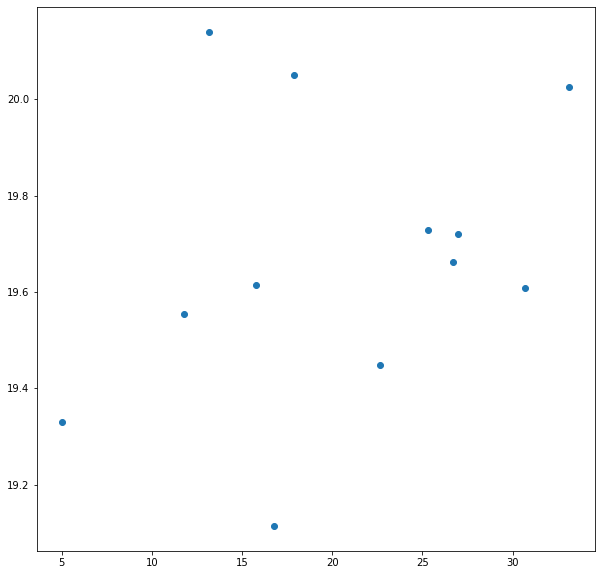

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predicted_svr = model_svr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_predicted_svr)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svr))
print(rms)
r_square = model_svr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svr)
print(mape)

8.052008528668637
0.009205597073209781
7.063127896147573
0.517227031374133


In [ ]:
#Hyperparameter Tuning
c_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 2, 5)
parameters = {'kernel': ['rbf'], 'C': c_range,'gamma': gamma_range,'epsilon':[1,0.1,0.01,00.001]}
svr = SVR()
grid_search = GridSearchCV(svr, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 100.0, 'epsilon': 1, 'gamma': 100.0, 'kernel': 'rbf'}


In [ ]:
model_svrhp = grid_search.best_estimator_
model_svrhp.fit(X_train,y_train)
y_predicted_svrhp = model_svrhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svrhp))
print(rms)
r_square = model_svrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svrhp)
print(mape)

8.440688903083613
-0.0887567983574693
7.240164373488331
0.4437238535046541


                   **ADABoost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model_abr = AdaBoostRegressor().fit(X_train, y_train)
y_predicted_abr = model_abr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abr))
print(rms)
r_square = model_abr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abr)
print(mape)

7.61557095762577
0.1137014677358037
5.906489728210317
0.3844479618913828


In [ ]:
#Hyperparametrer Tuning
param_grid = {'n_estimators':list(range(0, 1000, 100)), 'learning_rate':[100,10,1,0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
#fit the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_adbhp = grid_search.best_estimator_
model_adbhp.fit(X_train,y_train)
y_predicted_abrhp = model_adbhp.predict(X_test) 

{'learning_rate': 1, 'n_estimators': 300}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abrhp))
print(rms)
r_square = model_adbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abrhp)
print(mape)

8.117067834944642
-0.0068700969837394155
5.9386145725946955
0.3828955102486901


                          **Ridge**

In [ ]:
#Ridge Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)

{'alpha': 1}


In [ ]:
model_rr = Ridge(alpha=1).fit(X_train,y_train)
y_predicted_rr = model_rr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rr))
print(rms)
r_square = model_rr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rr)
print(mape)

8.01998269309356
0.017071439611008654
6.729509115020594
0.46840473701374274


                         **Lasso**

In [ ]:
#Lasso Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.linear_model import Lasso
lasso = Lasso()
a = [0.000000000000000000000000001*(10)**i for i in range(100)]
parameters = {"alpha":a}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-27, 1e-26, 1e-25, 1.0000000000000001e-24,
                                   1.0000000000000001e-23, 1e-22,
                                   1.0000000000000001e-21,
                                   1.0000000000000001e-20,
                                   1.0000000000000001e-19, 1e-18, 1e-17, 1e-16,
                                   1e-15, 1e-14, 1e-13, 1e-12,
                                   1.0000000000000001e-11, 1e-10, 1e-09, 1e-08,
                                   1.0000000000000001e-07, 1e-06, 1e-05,
                                   9.999999999999999e-05, 0.001,
                                   0.010000000000000002, 0.1, 1.0, 10.0, 100.0, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)

{'alpha': 0.1}


In [ ]:
model_lr = Lasso(alpha=0.1).fit(X_train,y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

7.482977143298233
0.14429527618159943
6.305769581729328
0.45181696782667763


                        **ANN**

In [ ]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
input_unit = 41
hidden_units2 = 10
learning_rate = 0.001
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(input_unit, kernel_initializer='normal', activation='relu'),
    Dropout(0.4),
    # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=150, 
    batch_size=32,
    validation_split=0.3
)

Epoch 1/150
1/1 [==============================] - 1s 705ms/step - loss: 7.9393 - mean_squared_logarithmic_error: 7.9393 - val_loss: 8.8849 - val_mean_squared_logarithmic_error: 8.8849
Epoch 2/150
1/1 [==============================] - 0s 34ms/step - loss: 7.9065 - mean_squared_logarithmic_error: 7.9065 - val_loss: 8.8661 - val_mean_squared_logarithmic_error: 8.8661
Epoch 3/150
1/1 [==============================] - 0s 33ms/step - loss: 7.8730 - mean_squared_logarithmic_error: 7.8730 - val_loss: 8.8474 - val_mean_squared_logarithmic_error: 8.8474
Epoch 4/150
1/1 [==============================] - 0s 54ms/step - loss: 7.8637 - mean_squared_logarithmic_error: 7.8637 - val_loss: 8.8275 - val_mean_squared_logarithmic_error: 8.8275
Epoch 5/150
1/1 [==============================] - 0s 35ms/step - loss: 7.8133 - mean_squared_logarithmic_error: 7.8133 - val_loss: 8.8075 - val_mean_squared_logarithmic_error: 8.8075
Epoch 6/150
1/1 [==============================] - 0s 36ms/step - loss: 7.8322 

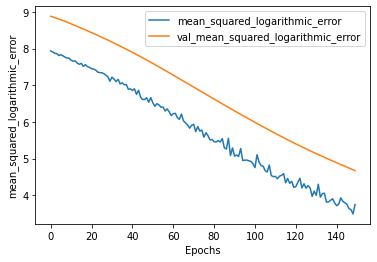

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
Y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Y_pred)
rmse = math.sqrt(mse)
print(rmse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Y_pred)
print(r2)
mae = mean_absolute_error(y_test,Y_pred)
print(mae)
mape = mean_absolute_percentage_error(y_test, Y_pred)
print(mape)

20.391987396033137
-5.354687525718007
18.71944982715922
0.893871165763707
